<a href="https://colab.research.google.com/github/pedrostrepeckes/TCC/blob/master/tcc_VGG19_arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGGNet19

In [0]:
import tensorflow as tf
import keras
import gc
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, Dense, Flatten, MaxPooling2D, Dropout, AveragePooling2D, Activation
from keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
import random
import time
from google.colab import drive
from scipy import stats
import pandas as pd
from keras.utils.data_utils import get_file
from keras.initializers import he_normal
from keras import optimizers
from keras.layers.normalization import BatchNormalization


drive.mount('/content/gdrive')

device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
  #raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Using TensorFlow backend.



Enter your authorization code:
··········
Mounted at /content/gdrive
Found GPU at: /device:GPU:0


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 42s 0us/step


In [0]:
from keras import backend as K
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)
    
WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
filepath = get_file('vgg19_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH, cache_subdir='models')




574717952/574710816 [==============================] - 41s 0us/step


# Definicoes

---



In [0]:
epoch1 = 100
epoch2 = 100
epoch3 = 100
images_path = '/content/gdrive/My Drive/TCC/tcc_uergs/codigos/Redes/VGGNet19/arch_mod/'
#num_classes  = 10
#batch_size   = 128
#epochs       = 200
#iterations   = 391
dropout      = 0.5
weight_decay = 0.0001
size_batch1 = 128
size_batch2 = 128
size_batch3 = 128

In [0]:
def build_model1():
    model = Sequential()
    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv1', input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    # model modification for cifar-10
    model.add(Flatten(name='flatten'))
    model.add(Dense(4096, use_bias = True, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc_cifa10'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(4096, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc2'))  
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))      
    model.add(Dense(10, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='predictions_cifa10'))        
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    # load pretrained weight from VGG19 by name      
    model.load_weights(filepath, by_name=True)

    # -------- optimizer setting -------- #
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model



In [0]:
def build_model2():
    model = Sequential()
    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv1', input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv3'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv4'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv3'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv4'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv3'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv4'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    # model modification for cifar-10
    model.add(Flatten(name='flatten'))
    model.add(Dense(4096, use_bias = True, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc_cifa10'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(4096, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc2'))  
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))      
    model.add(Dense(10, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='predictions_cifa10'))        
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    # load pretrained weight from VGG19 by name      
    model.load_weights(filepath, by_name=True)

    # -------- optimizer setting -------- #
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model



In [0]:
def build_model3():
    model = Sequential()
    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv1', input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block1_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block2_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(1, 1), name='block2_pool'))
    
    # Block 2.5
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(1, 1)))

    # Block 3
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv3'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block3_conv4'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv3'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block4_conv4'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv2'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv3'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='block5_conv4'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    # model modification for cifar-10
    model.add(Flatten(name='flatten'))
    model.add(Dense(4096, use_bias = True, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc_cifa10'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(4096, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='fc2'))  
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))      
    model.add(Dense(10, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal(), name='predictions_cifa10'))        
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    # load pretrained weight from VGG19 by name      
    model.load_weights(filepath, by_name=True)

    # -------- optimizer setting -------- #
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model



In [0]:
def scheduler1(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001
  
def scheduler2(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001

def scheduler3(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001

# Preprocessing

In [0]:
print(x_train.mean())
mean = {}
mean[0] = x_train[:,:,:,0].mean()
mean[1] = x_train[:,:,:,1].mean()
mean[2] = x_train[:,:,:,2].mean()

print(x_train.std())
std = {}
std[0] = x_train[:,:,:,0].std()
std[1] = x_train[:,:,:,1].std()
std[2] = x_train[:,:,:,2].std()

#for i in range(3):
#        x_train[:,:,:,i] = (x_train[:,:,:,i] - mean[i]) / std[i]
#        x_test[:,:,:,i] = (x_test[:,:,:,i] - mean[i]) / std[i]


#uma imagem
#x_train[1,:,:,:].size
#x_train[1,:,:,:]


120.70756512369792
64.1500758911213


In [0]:
Y_test = y_test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#print(x_test.mean)
#df_x_test = pd.DataFrame( data=x_test[1:,1:], index=x_test[1:,0], columns=x_test[0,1:] )

# build network
model_lr1 = build_model1()
model_lr2 = build_model2()
model_lr3 = build_model3()
print(model_lr1.summary())

# set callback
#tb_cb = TensorBoard(log_dir='./lenet', histogram_freq=0)
change_lr1 = LearningRateScheduler(scheduler1)
change_lr2 = LearningRateScheduler(scheduler2)
change_lr3 = LearningRateScheduler(scheduler3)
#cbks = [change_lr,tb_cb]
cbks1 = [change_lr1]
cbks2 = [change_lr2]
cbks3 = [change_lr3]

history = {}

#plt.imshow(x_test[random.randint(1, 10000)])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activat

In [0]:
# start train
start = time.time()
history[0] = model_lr1.fit(x_train, y_train,
                           batch_size=size_batch1,
                           epochs=epoch1,
                           callbacks=cbks1,
                           validation_data=(x_test, y_test),
                           shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 38s 763us/step - loss: 1.9625 - acc: 0.6522 - val_loss: 1.9361 - val_acc: 0.6568
Epoch 2/100
50000/50000 [==============================] - 29s 576us/step - loss: 1.5880 - acc: 0.7773 - val_loss: 1.8776 - val_acc: 0.6824
Epoch 3/100
50000/50000 [==============================] - 29s 574us/step - loss: 1.4376 - acc: 0.8253 - val_loss: 1.6465 - val_acc: 0.7512
Epoch 4/100
50000/50000 [==============================] - 28s 568us/step - loss: 1.3235 - acc: 0.8605 - val_loss: 1.8251 - val_acc: 0.7053
Epoch 5/100
50000/50000 [==============================] - 29s 573us/step - loss: 1.2333 - acc: 0.8865 - val_loss: 1.7149 - val_acc: 0.7388
Epoch 6/100
50000/50000 [==============================] - 29s 572us/step - loss: 1.1615 - acc: 0.9073 - val_loss: 1.5673 - val_acc: 0.7854
Epoch 7/100
50000/50000 [==============================] - 28s

In [0]:
start = time.time()
history[1] = model_lr2.fit(x_train, y_train,
                        batch_size=size_batch2,
                        epochs=epoch2,
                        callbacks=cbks2,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 51s 1ms/step - loss: 1.8240 - acc: 0.7379 - val_loss: 1.8018 - val_acc: 0.7330
Epoch 2/100
50000/50000 [==============================] - 44s 888us/step - loss: 1.4984 - acc: 0.8375 - val_loss: 1.5981 - val_acc: 0.7969
Epoch 3/100
50000/50000 [==============================] - 44s 890us/step - loss: 1.3657 - acc: 0.8765 - val_loss: 1.5387 - val_acc: 0.8142
Epoch 4/100
50000/50000 [==============================] - 44s 887us/step - loss: 1.2656 - acc: 0.9070 - val_loss: 1.5240 - val_acc: 0.8241
Epoch 5/100
50000/50000 [==============================] - 44s 882us/step - loss: 1.2011 - acc: 0.9230 - val_loss: 1.6026 - val_acc: 0.8108
Epoch 6/100
50000/50000 [==============================] - 44s 885us/step - loss: 1.1489 - acc: 0.9367 - val_loss: 1.5473 - val_acc: 0.8238
Epoch 7/100
50000/50000 [==============================] - 44s 882us/step - loss: 1.1068 - acc: 0.9459 - val_los

In [0]:

start = time.time()
history[2] = model_lr3.fit(x_train, y_train,
                        batch_size=size_batch3,
                        epochs=epoch3,
                        callbacks=cbks3,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 86s 2ms/step - loss: 2.0208 - acc: 0.6823 - val_loss: 1.8966 - val_acc: 0.7274
Epoch 2/100
50000/50000 [==============================] - 76s 2ms/step - loss: 1.6355 - acc: 0.8094 - val_loss: 1.9437 - val_acc: 0.7154
Epoch 3/100
50000/50000 [==============================] - 76s 2ms/step - loss: 1.4875 - acc: 0.8528 - val_loss: 1.7981 - val_acc: 0.7581
Epoch 4/100
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3851 - acc: 0.8829 - val_loss: 1.6072 - val_acc: 0.8107
Epoch 5/100
50000/50000 [==============================] - 76s 2ms/step - loss: 1.3116 - acc: 0.9021 - val_loss: 1.6351 - val_acc: 0.8011
Epoch 6/100
50000/50000 [==============================] - 76s 2ms/step - loss: 1.2478 - acc: 0.9194 - val_loss: 1.6679 - val_acc: 0.7965
Epoch 7/100
50000/50000 [==============================] - 76s 2ms/step - loss: 1.1953 - acc: 0.9319 - val_loss: 1.6295 - 

In [0]:
model_lr1.save(images_path + 'lenet1.h5')
model_lr2.save(images_path + 'lenet2.h5')
model_lr3.save(images_path + 'lenet3.h5')
fig, ax = plt.subplots()
ax.plot(history[0].history['acc'], label='Modelo 1')
ax.plot(history[1].history['acc'], label='Modelo 2')
ax.plot(history[2].history['acc'], label='Modelo 3')

legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.savefig(images_path + 'metric_var_lr_accuracy.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

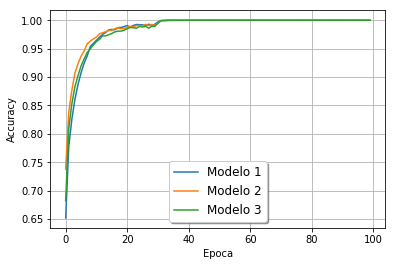

In [0]:
model_lr1.save(images_path + 'lenet1.h5')
model_lr2.save(images_path + 'lenet2.h5')
model_lr3.save(images_path + 'lenet3.h5')
fig, ax = plt.subplots()
ax.plot(history[0].history['acc'], label='Modelo 1')
ax.plot(history[1].history['acc'], label='Modelo 2')
ax.plot(history[2].history['acc'], label='Modelo 3')

legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.savefig(images_path + 'metric_var_lr_accuracy.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

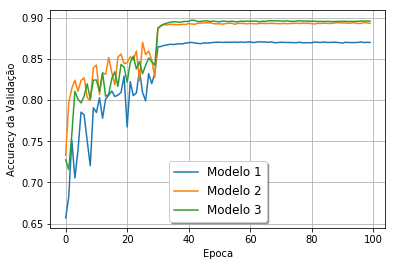

In [0]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_acc'], label='Modelo 1')
ax.plot(history[1].history['val_acc'], label='Modelo 2')
ax.plot(history[2].history['val_acc'], label='Modelo 3')

legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Accuracy da Validação')
plt.savefig(images_path + 'metric_var_lr_val_accuracy.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

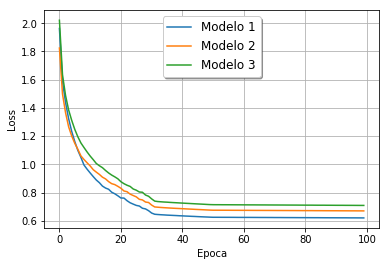

In [0]:
fig, ax = plt.subplots()
ax.plot(history[0].history['loss'], label='Modelo 1')
ax.plot(history[1].history['loss'], label='Modelo 2')
ax.plot(history[2].history['loss'], label='Modelo 3')


legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.savefig(images_path + 'metric_var_lr_loss.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

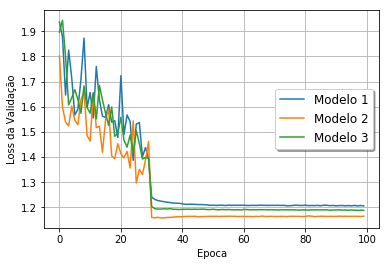

In [0]:
fig, ax = plt.subplots()
chartBox = ax.get_position()
ax.plot(history[0].history['val_loss'], label='Modelo 1')
ax.plot(history[1].history['val_loss'], label='Modelo 2')
ax.plot(history[2].history['val_loss'], label='Modelo 3')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Loss da Validação')
plt.savefig(images_path + 'metric_var_lr_val_loss.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

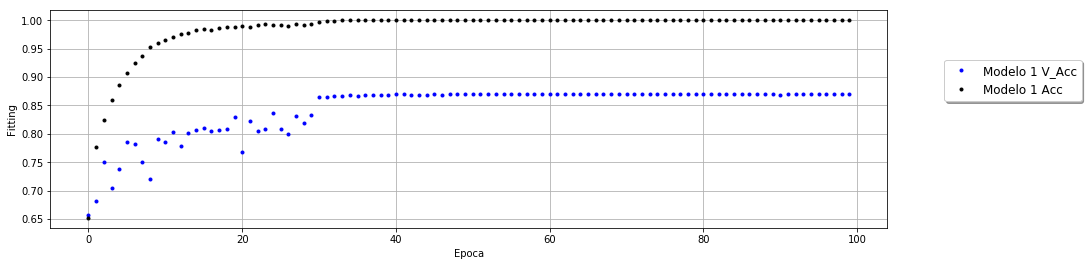

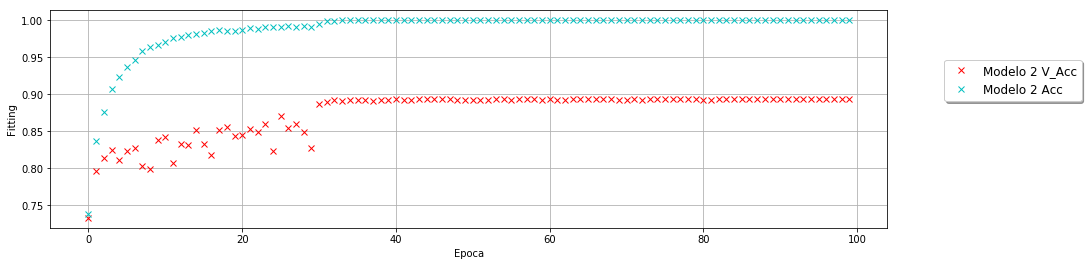

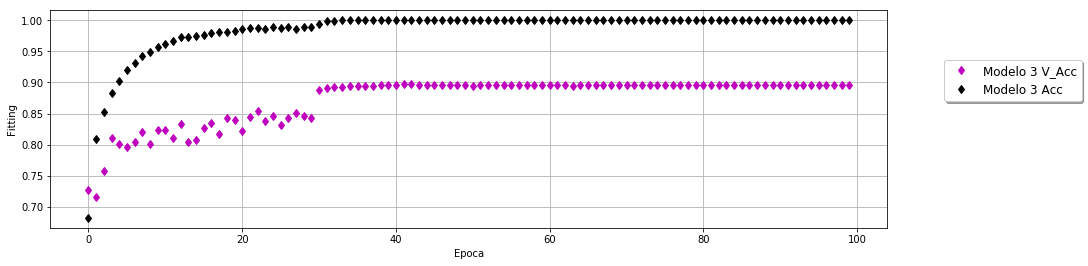

In [0]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_acc'], '.',color = 'b', label='Modelo 1 V_Acc')
ax.plot(history[0].history['acc'], '.', color = 'k', label='Modelo 1 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting1.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
ax.plot(history[1].history['val_acc'], 'x',color = 'r', label='Modelo 2 V_Acc')
ax.plot(history[1].history['acc'], 'x',color = 'c', label='Modelo 2 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting2.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
ax.plot(history[2].history['val_acc'], 'd',color = 'm', label='Modelo 3 V_Acc')
ax.plot(history[2].history['acc'], 'd',color = 'k', label='Modelo 3 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting3.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()


#Metricas

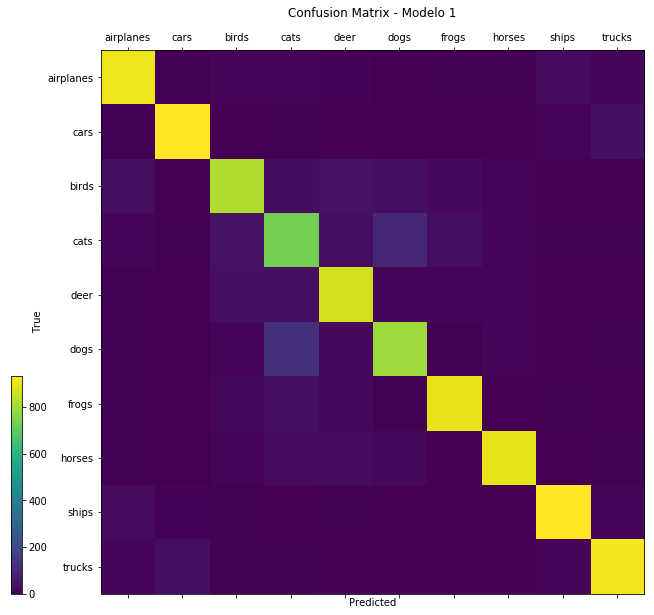

In [0]:
Y_pred1 = model_lr1.predict(x_test)

import numpy as np
y_pred1 = np.argmax(Y_pred1, axis=1)
#print (y_pred1)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
#labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = skmetrics.confusion_matrix(Y_test, y_pred1)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 1')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'metric_var_lr_cm_model1_.png', bbox_inches='tight', dpi=1000)
plt.show()

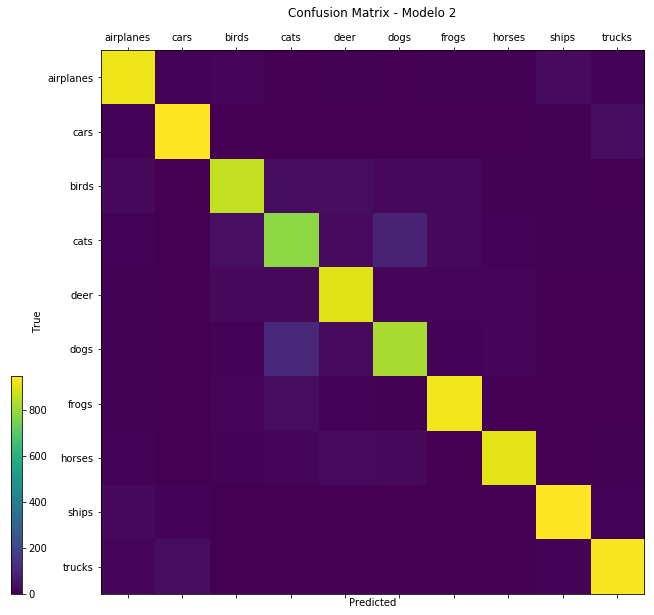

In [0]:
Y_pred2 = model_lr2.predict(x_test)

import numpy as np
y_pred2 = np.argmax(Y_pred2, axis=1)
#print (y_pred2)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
cm = skmetrics.confusion_matrix(Y_test, y_pred2)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 2')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'train_history_cm_model2_.png', bbox_inches='tight', dpi=1000)
plt.show()

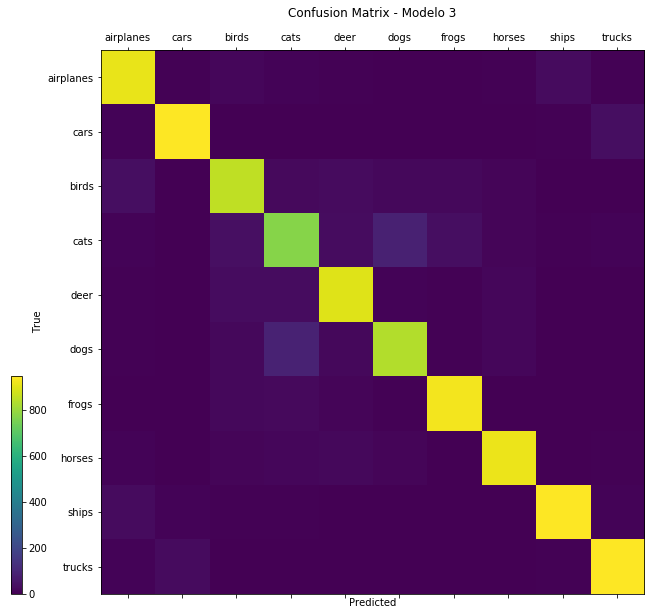

In [0]:
Y_pred3 = model_lr3.predict(x_test)

import numpy as np
y_pred3 = np.argmax(Y_pred3, axis=1)
#print (y_pred2)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
cm = skmetrics.confusion_matrix(Y_test, y_pred3)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height*1.5])
plt.title('Confusion Matrix - Modelo 3')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'train_history_cm_model3_.png', bbox_inches='tight', dpi=1000)
plt.show()

In [0]:
precision = {}
recall = {}
fbeta_score = {}
support = {}
precision[0], recall[0], fbeta_score[0], support[0] = skmetrics.precision_recall_fscore_support(Y_test, y_pred1)
precision[1], recall[1], fbeta_score[1], support[1] = skmetrics.precision_recall_fscore_support(Y_test, y_pred2)
precision[2], recall[2], fbeta_score[2], support[2] = skmetrics.precision_recall_fscore_support(Y_test, y_pred3)


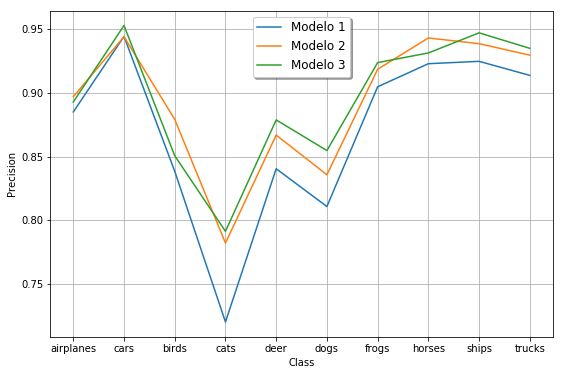

In [0]:
fig, ax = plt.subplots()
ax.plot(labels,precision[0], label='Modelo 1')
ax.plot(labels,precision[1], label='Modelo 2')
ax.plot(labels,precision[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height*1.5])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_precision_.png', bbox_inches='tight', dpi=1000)
plt.show()

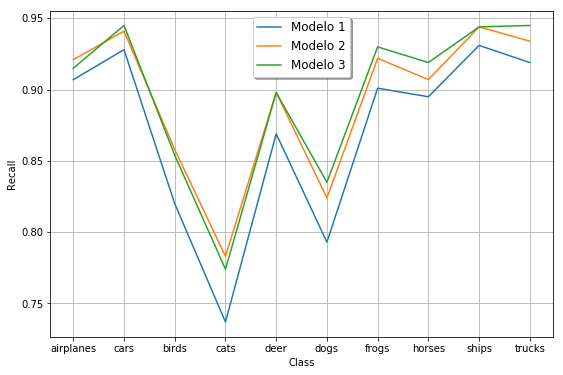

In [0]:
fig, ax = plt.subplots()
ax.plot(labels,recall[0], label='Modelo 1')
ax.plot(labels,recall[1], label='Modelo 2')
ax.plot(labels,recall[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height*1.5])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_recall_.png', bbox_inches='tight', dpi=1000)
plt.show()

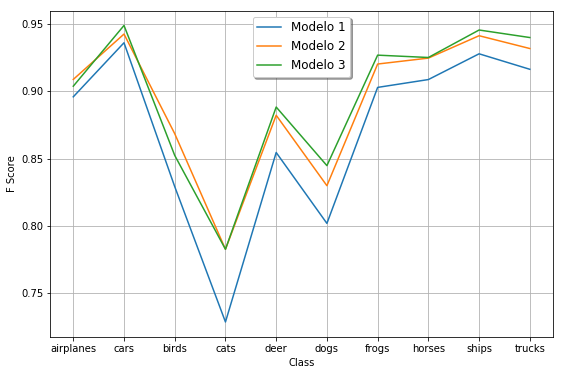

In [0]:
fig, ax = plt.subplots()
ax.plot(labels,fbeta_score[0], label='Modelo 1')
ax.plot(labels,fbeta_score[1], label='Modelo 2')
ax.plot(labels,fbeta_score[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height*1.5])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('F Score')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_fscore.png', bbox_inches='tight', dpi=1000)
plt.show()

In [0]:
print('Modelo 1 \n')
print('accuracy ' + str(history[0].history['acc'][-1]))
print('validation accuracy ' + str(history[0].history['val_acc'][-1]))
print('loss ' + str(history[0].history['loss'][-1]))
print('validation loss ' + str(history[0].history['val_loss'][-1]))

Modelo 1 

accuracy 1.0
validation accuracy 0.87
loss 0.6210695296096802
validation loss 1.2061470121383666


In [0]:
print('Modelo 2 \n')
print('accuracy ' + str(history[1].history['acc'][-1]))
print('validation accuracy ' + str(history[1].history['val_acc'][-1]))
print('loss ' + str(history[1].history['loss'][-1]))
print('validation loss ' + str(history[1].history['val_loss'][-1]))

Modelo 2 

accuracy 1.0
validation accuracy 0.8932
loss 0.6707441313934326
validation loss 1.165219843864441


In [0]:
print('Modelo 3 \n')
print('accuracy ' + str(history[2].history['acc'][-1]))
print('validation accuracy ' + str(history[2].history['val_acc'][-1]))
print('loss ' + str(history[2].history['loss'][-1]))
print('validation loss ' + str(history[2].history['val_loss'][-1]))

Modelo 3 

accuracy 0.99996
validation accuracy 0.8959
loss 0.7095321154785156
validation loss 1.1885962009429931
